# Zastosowania DFT

In [83]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageOps
from skimage import measure
import numpy as np

## Funkcje pomocnicze

In [95]:
def show_image(image, lower_contrast=False, title='', scale=60, cmap='gray'):
    if lower_contrast:
        image = np.log(image)
    image = 255.*image/np.max(image)
    height, width = image.shape
    fig, ax = plt.subplots(figsize=(height//scale, width//scale))
    ax.set_title(title)
    ax.imshow(image, cmap=cmap, interpolation='none')
    plt.show()
    
def correlation(image, pattern):
    pattern_rotated = np.rot90(pattern, 2)
    frequencies_pattern = np.fft.fft2(pattern_rotated, image.shape)     
    frequencies_image = np.fft.fft2(image)
    return np.real(np.fft.ifft2(np.multiply(frequencies_pattern, frequencies_image)))

def filter_picks(image, sensitivity=0.9):
    image_filtered = np.copy(image)
    image_filtered[image<np.max(image)*sensitivity] = 0.
    return image_filtered

def show_filtered_objects(path, correlation, sensitivity=0.9, scale=70, title='', squares=True):
    image = Image.open(path)
    if squares:
        image = image.convert('L')
    image_arr = np.array(image)
    
    height, width = correlation.shape
    fig, ax = plt.subplots(figsize=(height//scale, width//scale))
    ax.set_title(title)
        
    image_filtered = filter_picks(correlation, sensitivity)

    if squares:
        objects_found = 0
        ax.imshow(image, cmap='gray', interpolation='none')
        for i in range(height):
            for j in range(width):
                if image_filtered[i][j]!=0.:
                    square = patches.Rectangle((j,i), -13, -13, linewidth=1, edgecolor='r', facecolor='none')
                    ax.add_patch(square)
                    letters_found+=1
    else:
        ax.imshow(image, interpolation='none')
        objects_found = len(measure.find_contours(image_filtered, sensitivity*np.max(image_filtered)))
        image_filtered[image_filtered==0] = np.nan
        ax.imshow(image_filtered, interpolation='none', cmap='Reds')
        
    plt.show()
    return objects_found


## Wczytanie danych

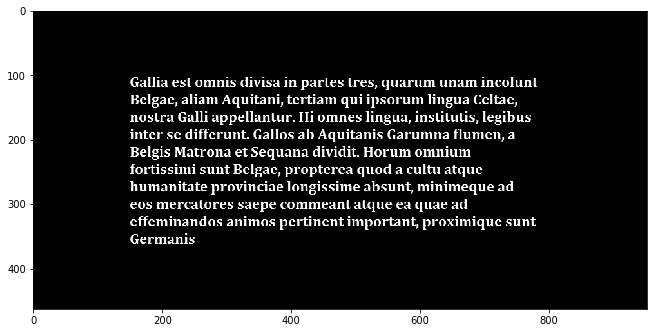

In [3]:
letters = ImageOps.invert(Image.open("galia.png").convert('L'))
letters_arr = np.array(letters)
show_image(letters_arr, scale=40)

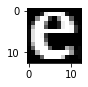

In [4]:
letter_e = ImageOps.invert(Image.open("galia_e.png").convert('L'))
letter_e_arr = np.array(letter_e)
show_image(letter_e_arr, scale=10)

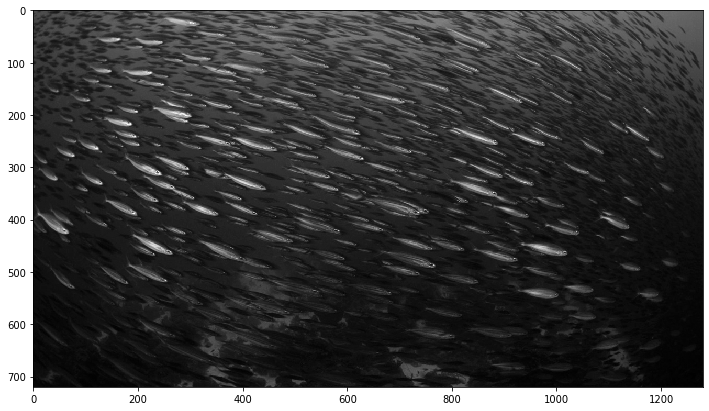

In [5]:
school = Image.open("school.jpg").convert('L')
school_arr = np.array(school)
show_image(school_arr)

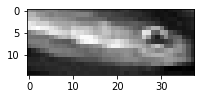

In [6]:
fish = Image.open("fish1.png").convert('L')
fish_arr = np.array(fish)
show_image(fish_arr, scale=5)

## Transformacja do domeny częstotliwości

In [7]:
frequencies_letters = np.fft.fftshift(np.fft.fft2(letters_arr))
frequencies_school = np.fft.fftshift(np.fft.fft2(school_arr))

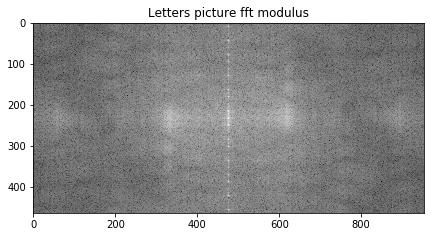

In [8]:
modulus_letters = np.absolute(frequencies_letters)
show_image(modulus_letters, lower_contrast=True, title='Letters picture fft modulus')

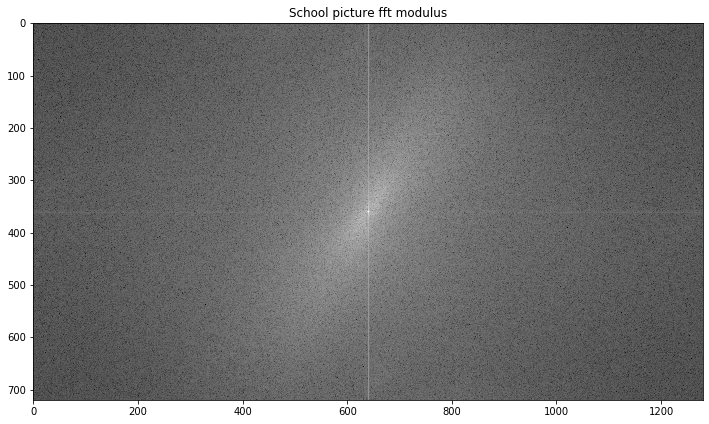

In [9]:
modulus_school = np.absolute(frequencies_school)
show_image(modulus_school, lower_contrast=True, title='School picture fft modulus')

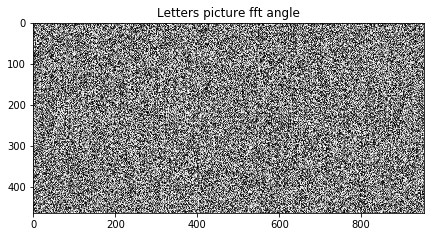

In [10]:
angle_letters = np.angle(frequencies_letters)
show_image(angle_letters, title='Letters picture fft angle')

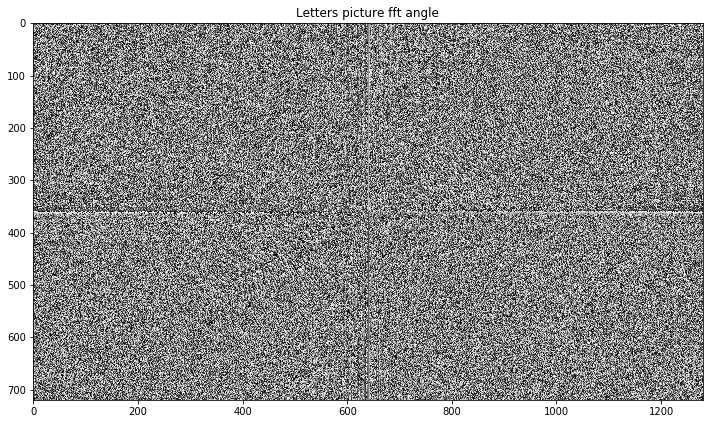

In [11]:
angle_school = np.angle(frequencies_school)
show_image(angle_school, title='Letters picture fft angle')

## Korelacja między wzorcem i obrazem


### Wyszukiwanie litery e w tekście

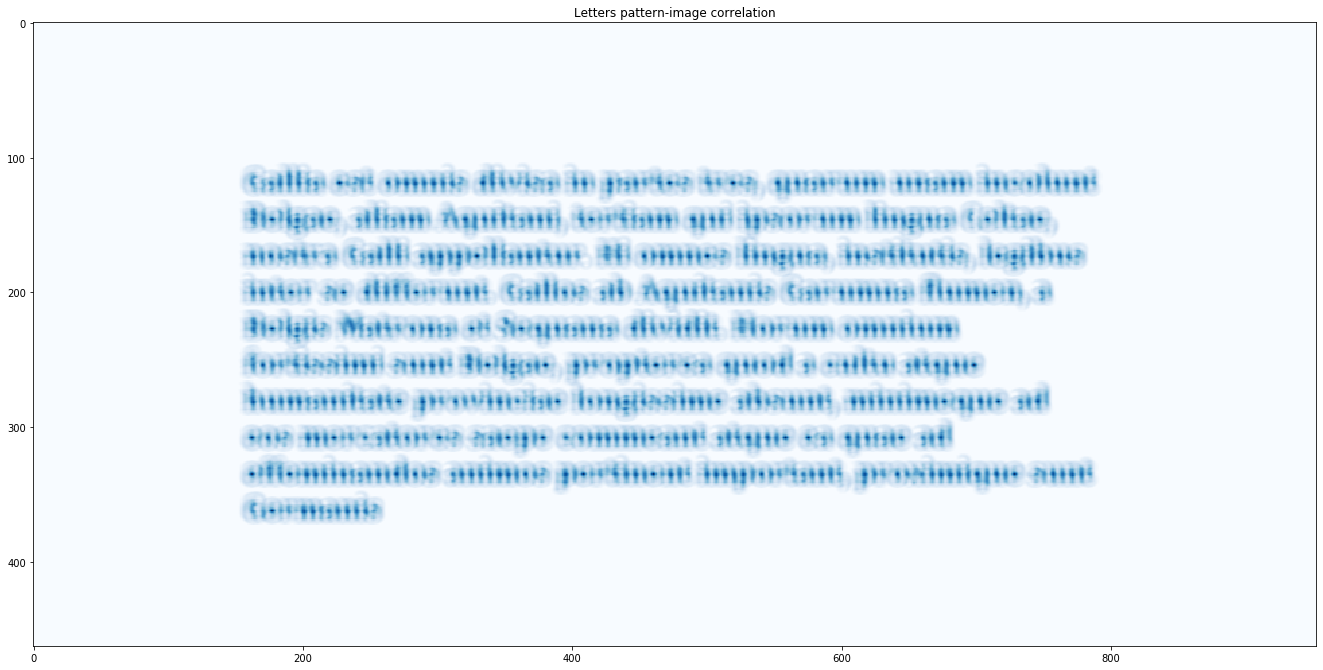

In [47]:
correlation_letters = correlation(letters_arr, letter_e_arr)
show_image(correlation_letters, title='Letters pattern-image correlation', scale=20, cmap='Blues')

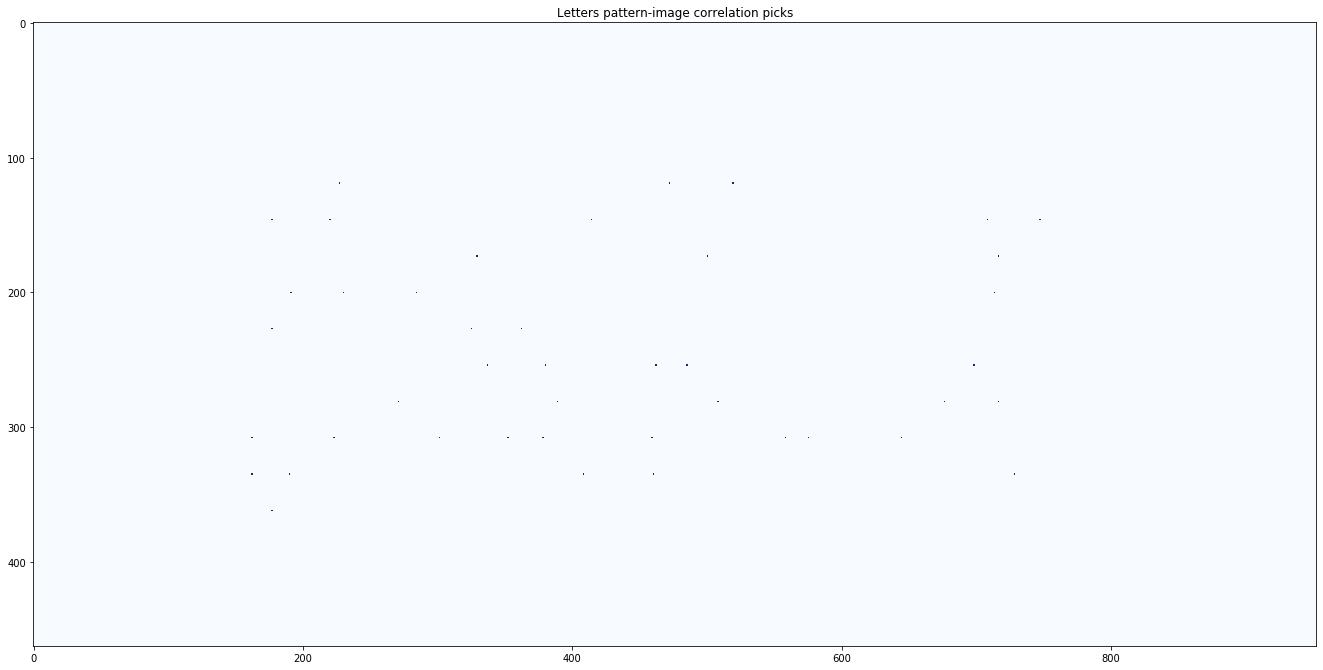

In [76]:
correlation_filtered_letters = filter_picks(correlation_letters, sensitivity=0.9)
show_image(correlation_filtered_letters, title='Letters pattern-image correlation picks', scale=20, cmap='Blues')

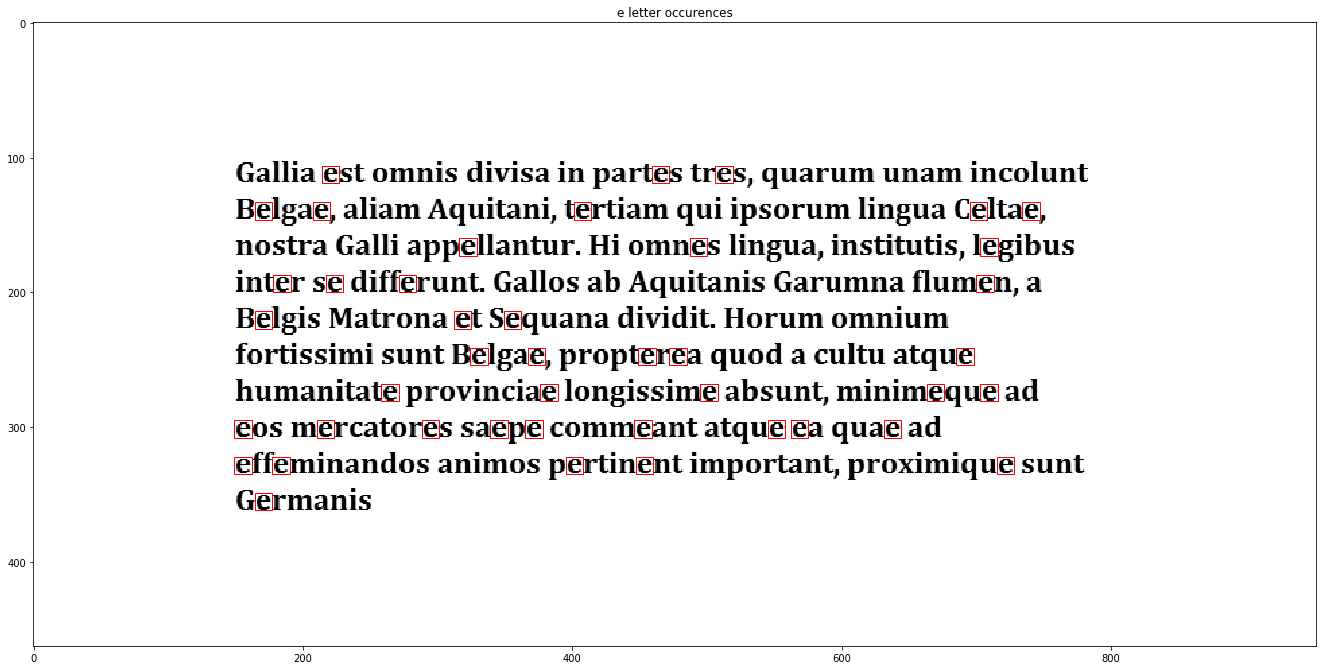

e letter occured 43 times


In [77]:
e_occurences = show_filtered_objects('galia.png', correlation_letters, sensitivity=0.9, scale=20, title='e letter occurences')
print(f'e letter occured {e_occurences} times')

### Wyszukiwanie ryb w ławicy

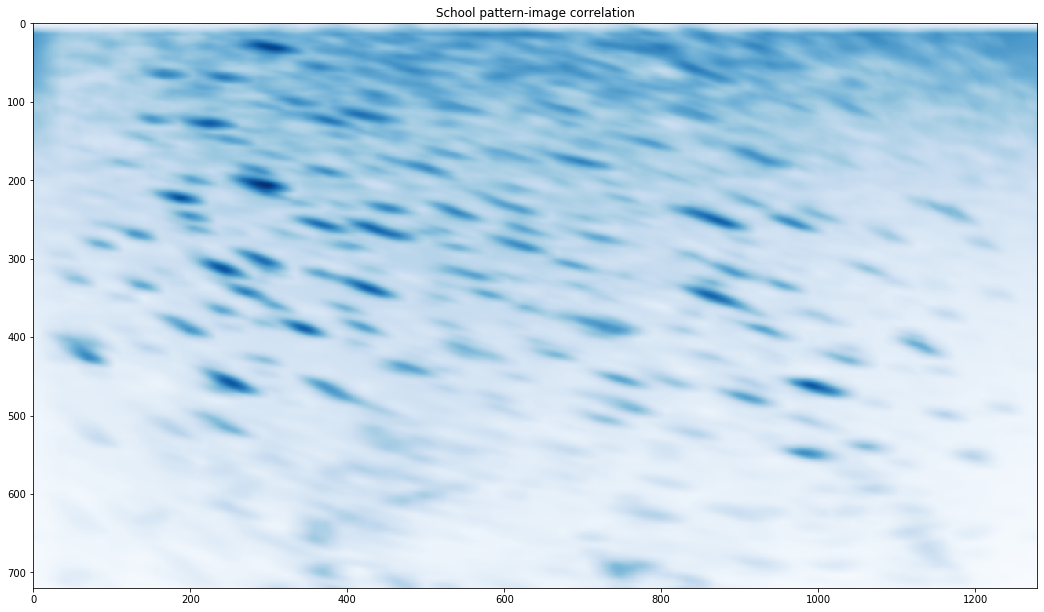

In [78]:
correlation_school = correlation(school_arr, fish_arr)
show_image(correlation_school, title='School pattern-image correlation', scale=40, cmap='Blues')

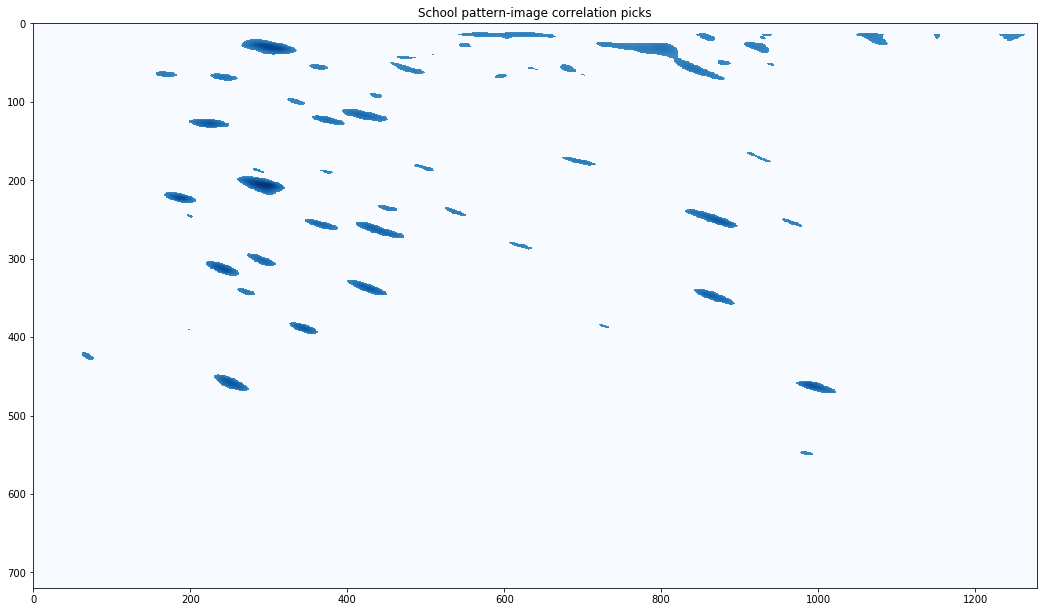

In [81]:
correlation_filtered_school = filter_picks(correlation_school, sensitivity=0.65)
show_image(correlation_filtered_school, title='School pattern-image correlation picks', scale=40, cmap='Blues')

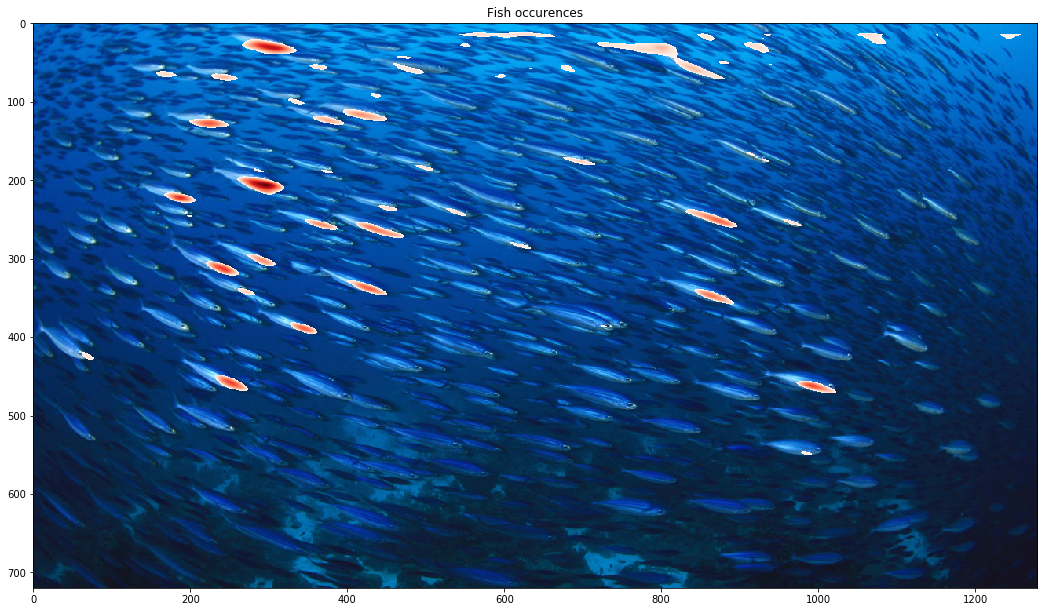

Fish pattern occured 54 times


In [98]:
fish_occurences = show_filtered_objects('school.jpg', correlation_school, sensitivity=0.655, 
                                        scale=40, title='Fish occurences', squares=False)
print(f'Fish pattern occured {fish_occurences} times')